In [2]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
# get only numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# library for plotting
#%%capture
! pip install ipywidgets


In [6]:
#from IPython.html import widgets
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [9]:
#An important step in testing your model is to split your data into training and testing data
#in place the target data price in a separate dataframe y
y_data = df['price']

#drop price data in x data
x_data = df.drop('price',axis = 1)

In [10]:
#randomly split data into training and testing data using the function train_test_split
#The test_size parameter sets the proportion of data that is split into the testing set(Here set to 15% of the total dataset)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size =0.15,random_state = 1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.score(x_test[['horsepower']],y_test)

0.707688374146705

In [15]:
lr.score(x_train[['horsepower']],y_train)

0.6449517437659684

In [25]:
#Cross-validation Score
#Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation
#The parameter 'cv' determines the number of folds; in this case 4
#The default scoring is R^2; each element in the array has the average R^2 value in the fold

from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=100)
Rcross

array([-4.82567672e+00, -2.71938468e-04, -3.08266760e+00, -2.34793926e+00,
       -2.51336899e+02, -5.18407424e+03, -3.62318844e+00, -3.47172002e+01,
       -4.44464884e+00, -5.47065783e+00, -1.97991813e+01, -8.20067896e+00,
       -4.30282281e+01, -6.20844567e+00, -5.35913026e+01, -5.32643309e+00,
       -2.43897710e+02, -3.76011075e+01, -1.00866802e+02,  9.91197470e-01,
       -5.12993759e-01,  7.99959686e-01, -1.16007042e+03, -1.10250067e+01,
       -5.56377179e+01,  4.41304207e-01, -2.89453820e-03,  5.56246730e-01,
       -9.57657899e-02, -1.29464561e+02,  7.19458520e-01, -6.53295201e+00,
       -1.07086210e+05, -1.14493286e+02, -2.15322944e+01, -1.38565985e-02,
       -1.13467643e+01, -5.35316138e+01, -3.10315749e+01, -3.65514897e+01,
       -7.22816170e-01, -7.22266620e+01, -4.73629520e+00, -5.27295794e+01,
       -5.62698512e-01, -1.17432310e+00, -3.60499162e+00, -4.36442201e+01,
       -8.47608268e+00, -3.03206579e+02, -4.76138386e+01, -1.72848042e-02,
       -6.68760338e+00, -

In [17]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [19]:
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lr,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [20]:
x_data[['horsepower']]

,horsepower
0,111.0
1,111.0
2,154.0
3,102.0
4,115.0
...,...
196,114.0
197,160.0
198,134.0
199,106.0


In [21]:
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [26]:
cross_val_score(lr,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([-20254142.84026704, -43745493.26505169, -12539630.34014931,
       -17561927.72247591])

In [27]:
#You can also use the function 'cross_val_predict' to predict the output
#The function splits up the data into the specified number of folds
#using one fold to get a prediction while the rest of the folds are used as test data

from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [28]:
#Overfitting, Underfitting and Model Selection
#It turns out that the test data sometimes referred to as the out of sample data is a much better measure of 
#how well your model performs in the real world. One reason for this is overfitting
#It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression

lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [29]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [15]:
#some model evaluation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

NameError: name 'yhat_train' is not defined

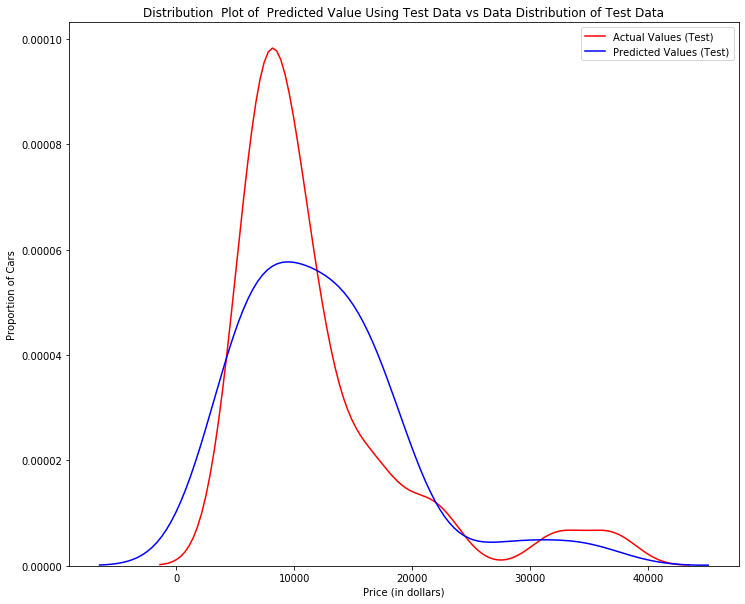

In [31]:
#So far the model seems to be doing well in learning from the training dataset
#But what happens when the model encounters new data from the testing dataset? 
#When the model generates new values from the test data,
#we see the distribution of the predicted values is much different from the actual target values

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [33]:
#Overfitting occurs when the model fits the noise, not the underlying process
#when testing your model using the test-set, your model does not perform as well as it is modelling noise,
#not the underlying process that generated the relationship

from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
#a degree 5 polynomial transformation
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [34]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [35]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


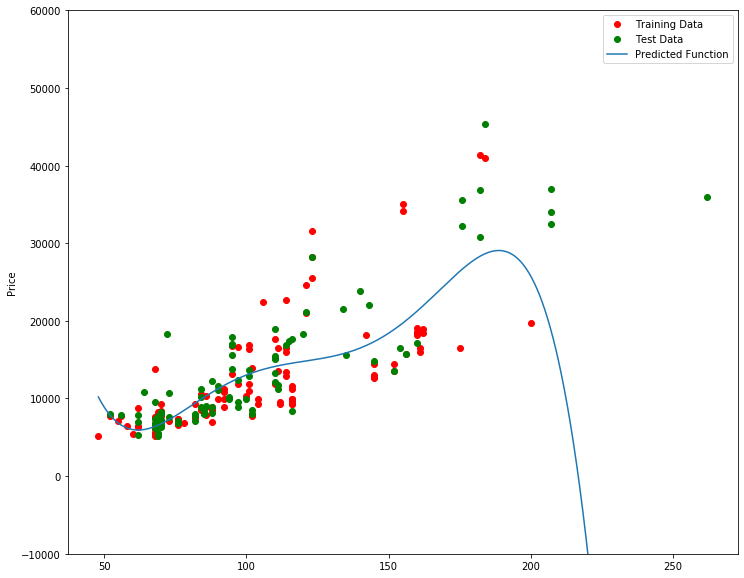

In [36]:
#We will use the function "PollyPlot" to display the training data, testing data, and the predicted function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [37]:
poly.score(x_train_pr, y_train)

0.5567716899817778

In [38]:
#the worse the model, a Negative R^2 is a sign of overfitting
poly.score(x_test_pr, y_test)

-29.871838229908324

Text(3, 0.75, 'Maximum R^2 ')

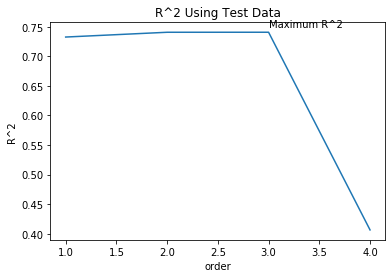

In [39]:
#Let's see how the R^2 changes on the test data for different order polynomials and plot the results
#We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [40]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [41]:
#The following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [43]:
pr1 = PolynomialFeatures(degree=2)

In [44]:
z_tr = x_train[['horsepower', 'curb-weight', 'engine-size' ,'highway-mpg']]
z_te = x_test[['horsepower', 'curb-weight', 'engine-size' ,'highway-mpg']]
x_train_pr_q = pr1.fit_transform(z_tr)
x_test_pr_q = pr1.fit_transform(z_te)

In [46]:
x_train_pr_q.shape

(110, 15)

In [47]:
x_test_pr_q.shape

(91, 15)

In [57]:
poly1 = LinearRegression().fit(x_train_pr_q,y_train)
poly1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

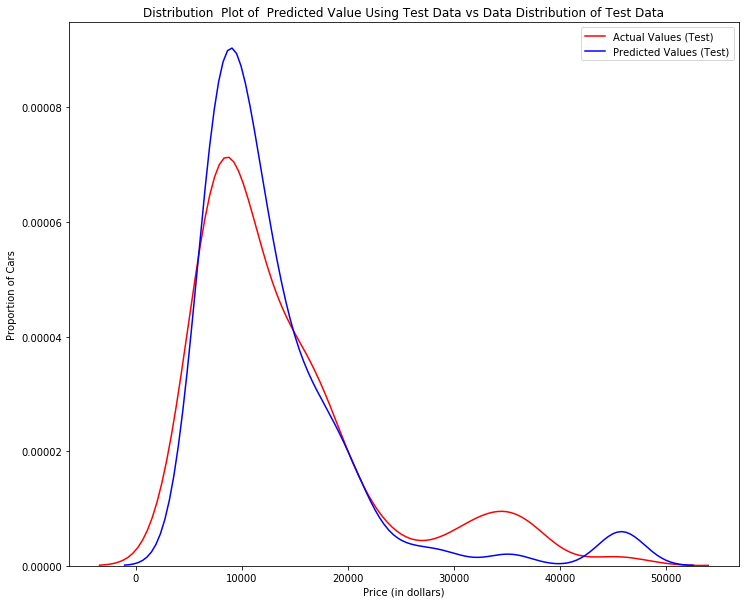

In [59]:
y_hat_test_q = poly1.predict(x_test_pr_q)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, y_hat_test_q, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [53]:
y_test

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
        ...   
2      16500.0
59     10245.0
136     7603.0
198    21485.0
43     11048.0
Name: price, Length: 91, dtype: float64

In [4]:
#The predicted value is lower than actual value for cars where the price  $ 10,000 range,
#conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range
#As such the model is not as accurate in these ranges 

In [12]:
#Ridge regression
#the parameter Alfa changes the model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 9589.40015921  6514.23158088 10604.73769887  5137.02179828]
test set : [ 9549.  6229. 10245.  7295.]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.43365e-17): result may not be accurate.
  overwrite_a=True).T


In [13]:
#We select the value of Alfa that minimizes the test error, for example, we can use a for loop
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

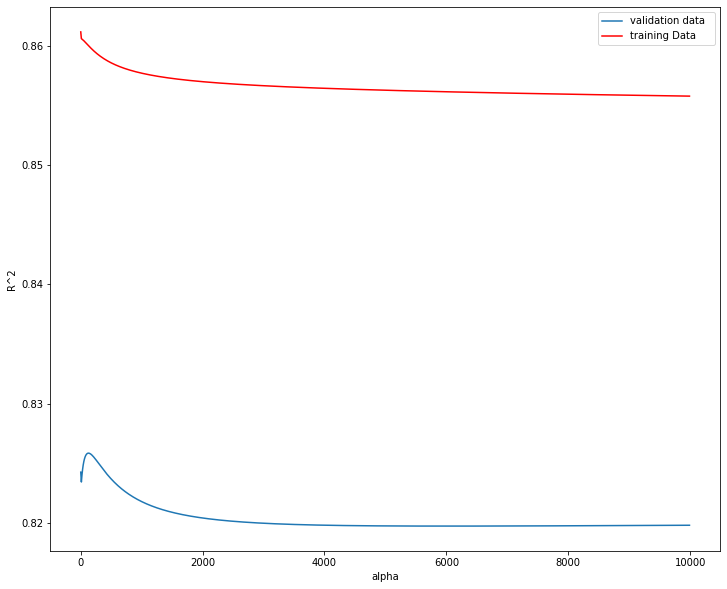

In [16]:
#plot out the value of R^2 for different Alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [18]:
#Grid Search
#The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler

from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [19]:
rr = Ridge()
rr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
grid1 = GridSearchCV(rr,parameters1,cv=4)
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
#The object finds the best parameter values on the validation data
BestRR=grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8254766467385016

In [26]:
#a grid search for the alpha parameter and the normalization parameter
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [27]:
BestRR.score(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

0.8087220102629341